In [27]:
from scipy.misc import imread, imresize, imsave
import numpy as np
import image_utils as iu
import matplotlib.pyplot as plt
from PIL import Image
import h5py
import time

In [28]:
dataset = iu.Dataset(image_dir='./test_image/', color_mode='F',slice_mode='rm_redundance', threshold=50, scale=4, stride=24, lr_size='same', save_path='./test.h5')

## Generate data and label

In [29]:
hrImage = imread('./test_image/Spidy.jpg', mode='F')

/home/wgy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


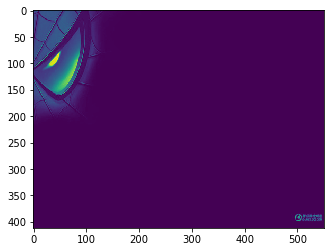

(412, 550)


In [30]:
plt.imshow(hrImage)
plt.show()
print(hrImage.shape)

In [31]:
data, label, N, _ = dataset._data_label_('Spidy.jpg')

In [32]:
print(data.shape, label.shape, N)

(38, 48, 48, 1) (38, 48, 48, 1) 38


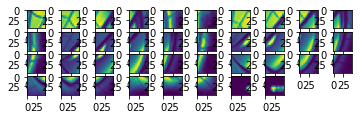

In [33]:
for i, img in enumerate(data):
    plt.subplot(10, 10, 1+i)
    plt.imshow(img.squeeze())
    if i >= 99:
        break
plt.show()

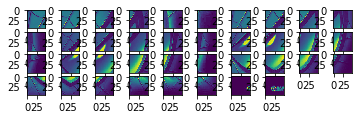

In [34]:
for i, img in enumerate(label):
    plt.subplot(10, 10, 1+i)
    plt.imshow(img.squeeze())
    if i >= 99:
        break
plt.show()

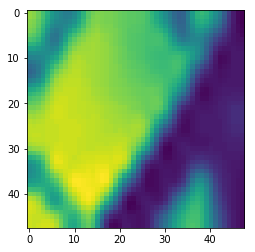

In [35]:
plt.imshow(data[2].squeeze())
plt.show()

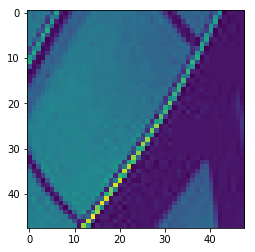

In [36]:
plt.imshow(label[2].squeeze())
plt.show()

## Save to h5

In [37]:
a = time.time()
dataset.save_data_label(verbose=1)
b = time.time()
print(a-b, 's')

 10 images have been written in h5 file, 90 remained.-687.5479192733765 s


In [20]:
hf = h5py.File('./test.h5', 'r')
print(hf['num_subimages'].value)

10081


In [26]:
hf1 = h5py.File('./test1.h5', 'r')
print(hf1['num_subimages'].value)

23977


In [21]:
label = np.array(hf['label'])
data = np.array(hf['data'])

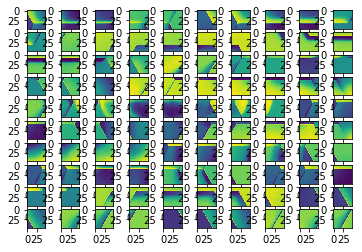

In [22]:
for i, img in enumerate(label[5000:]):
    plt.subplot(10, 10, 1+i)
    plt.imshow(img.squeeze())
    if i >= 99:
        break
plt.show()

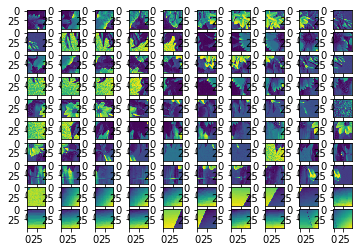

In [24]:
for i, img in enumerate(label[8000:]):
    plt.subplot(10, 10, 1+i)
    plt.imshow(img.squeeze())
    if i >= 99:
        break
plt.show()

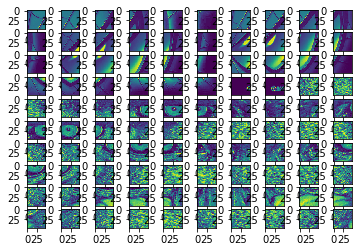

In [25]:
for i, img in enumerate(label[:]):
    plt.subplot(10, 10, 1+i)
    plt.imshow(img.squeeze())
    if i >= 99:
        break
plt.show()